# MUSIC GENRES CLASSIFICATION

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from scipy.stats import f_oneway

ABSOLUTE_PATH_CURRENT_DIR = Path.cwd()

## 0. Load our data

In [3]:
# Set absolute path for the dataset
absolute_path_dataset = ABSOLUTE_PATH_CURRENT_DIR.resolve().joinpath("data")

print(absolute_path_dataset)

/home/nii/Documents/SGU_2025_ML-Fundamentals/Laboratory/Challenge_MusicGenres/data


In [4]:
data_train = pd.read_csv(absolute_path_dataset / "train (1).csv")
data_test = pd.read_csv(absolute_path_dataset / "test (2).csv")

data_train.head(10)
# data_test.tail(10)

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.1060,0.2350,152.429,204947.000000,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.046800,0.1040,0.3800,132.921,191956.000000,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.635000,0.2840,0.6350,159.953,161037.000000,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.021300,0.3000,0.5010,172.472,298093.000000,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.2110,0.6190,88.311,254145.000000,4,5
5,6,Beck,Fuckin With My Head (Mountain Dew Rock),38.0,0.657,0.813,7.0,-7.861,1,0.2160,0.008340,0.049200,0.2080,0.5890,82.035,219587.000000,4,10
6,7,Shadow and Light,Blue,11.0,0.658,0.431,1.0,-12.718,0,0.0300,0.615000,0.292000,0.0902,0.5280,132.045,3.893933,5,0
7,8,Within The Ruins,Devil In Me,45.0,0.441,0.994,7.0,-2.934,1,0.2390,0.000073,0.000147,0.3820,0.0478,139.931,213125.000000,4,8
8,9,Crazy Cavan,My Little Sister Gotta Motorbike,38.0,0.446,0.816,9.0,-9.762,1,0.0766,0.318000,NaN,0.3390,0.7180,183.696,165293.000000,4,10
9,10,Day Sulan,Bailar,58.0,0.852,0.535,7.0,-5.940,0,0.0896,0.439000,0.000082,0.2460,0.4830,103.007,205056.000000,4,5


## 1. Overview (non-graphical)

### 1.1 Take a look at our data

In [5]:
data_train.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [7]:
# List (sort desc) all columns having missing values (null), with percentage in right extra column
count_null = data_train.isnull().sum()      # series
count_null = count_null[count_null != 0].sort_values(ascending=False) 

count_null_df = count_null.to_frame(name="Count")
count_null_df["%"] = (100 * count_null_df["Count"] / data_train.shape[0]).round(1)

count_null_df

,Count,%
instrumentalness,3541,24.6
key,1609,11.2
Popularity,333,2.3


- Comment: 
    + We have some columns which have a lot of missing values: 'instrumentalness', 'key', 'popularity'. 
    Of these, 'instrumentalness' is missing the most: nearly *1/4* size of row
    
&rarr; Consider dropping this column

## 2. Graphical 

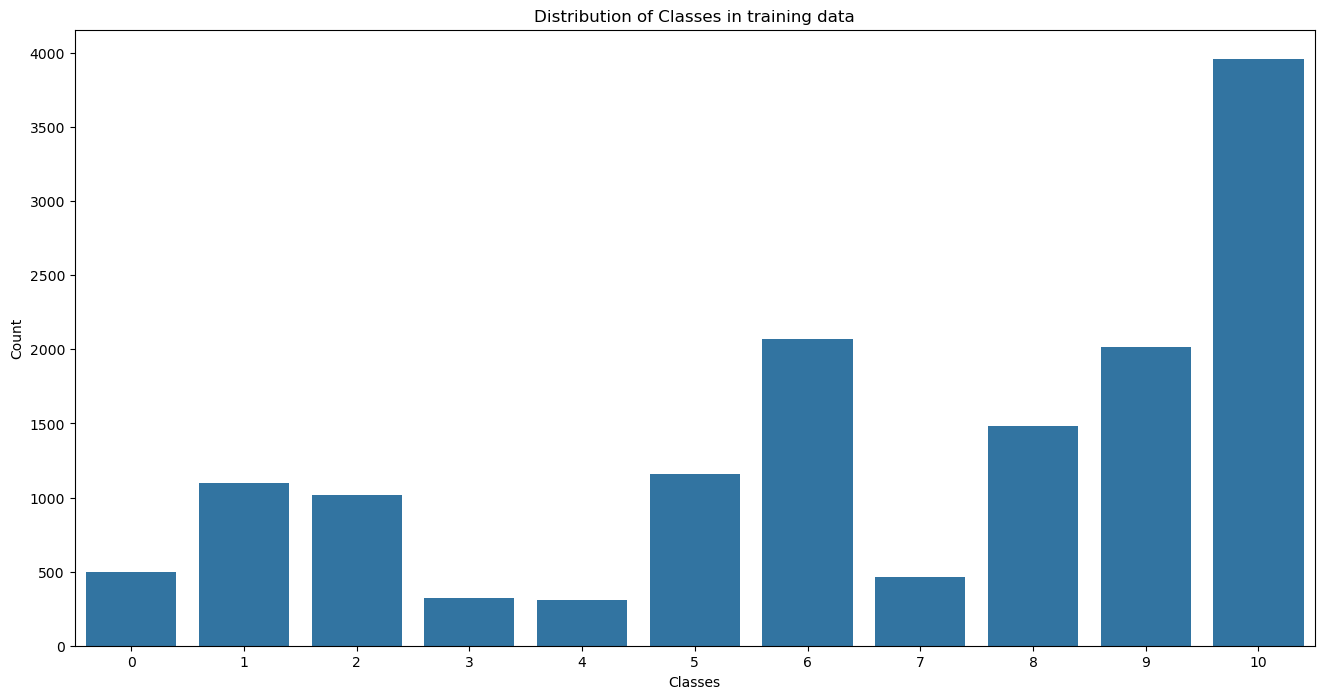

In [8]:
# The distribution of each class (output)
plt.figure(figsize=(16, 8))
# Use countplot to plot the distribution of the 'Class' column
sns.countplot(x=data_train['Class'])
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Distribution of Classes in training data')
plt.show()

- Comment: 
    + **Class 10** is dominant with *count_value ~= 4000*
    + Skewed distribution (not equivalent)

### 2.2 Correlation with output (classes)

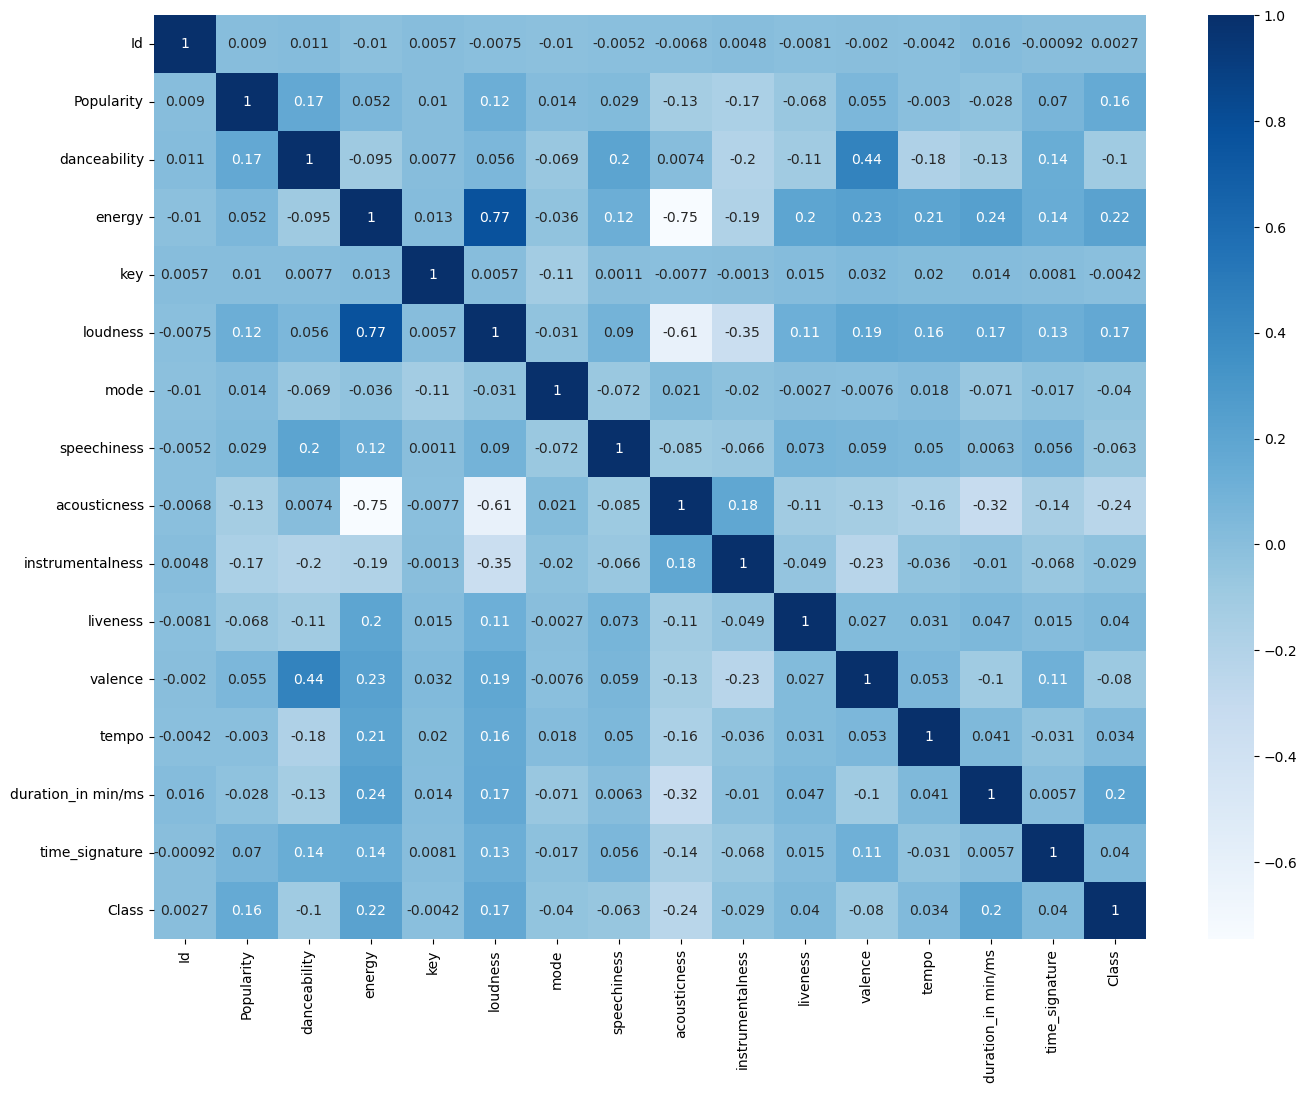

In [9]:
corr_matrix = data_train.corr(method='pearson', numeric_only=True)

# Visualize corr_matrix:
plt.figure(figsize=(16, 12))
sns.heatmap(data=corr_matrix, annot=True, cmap='Blues')
plt.show();

- Comment: 
    + **'energy', 'duration_in min/ms'**: high correlation with output classes
    + **'acousticness'**: high negative correlation with output classes

### 2.2 Class overlap: features &harr; classes, using boxplot and cross tabulation

- Class overlap: classes share ***similar value ranges*** for some features

E.g: feature **'energy'**
```markdown
Class 1: [----●----]       
Class 2:        [----●----] 
                    ^^^^^ 
            Overlap zone
```


#### a. Boxplot

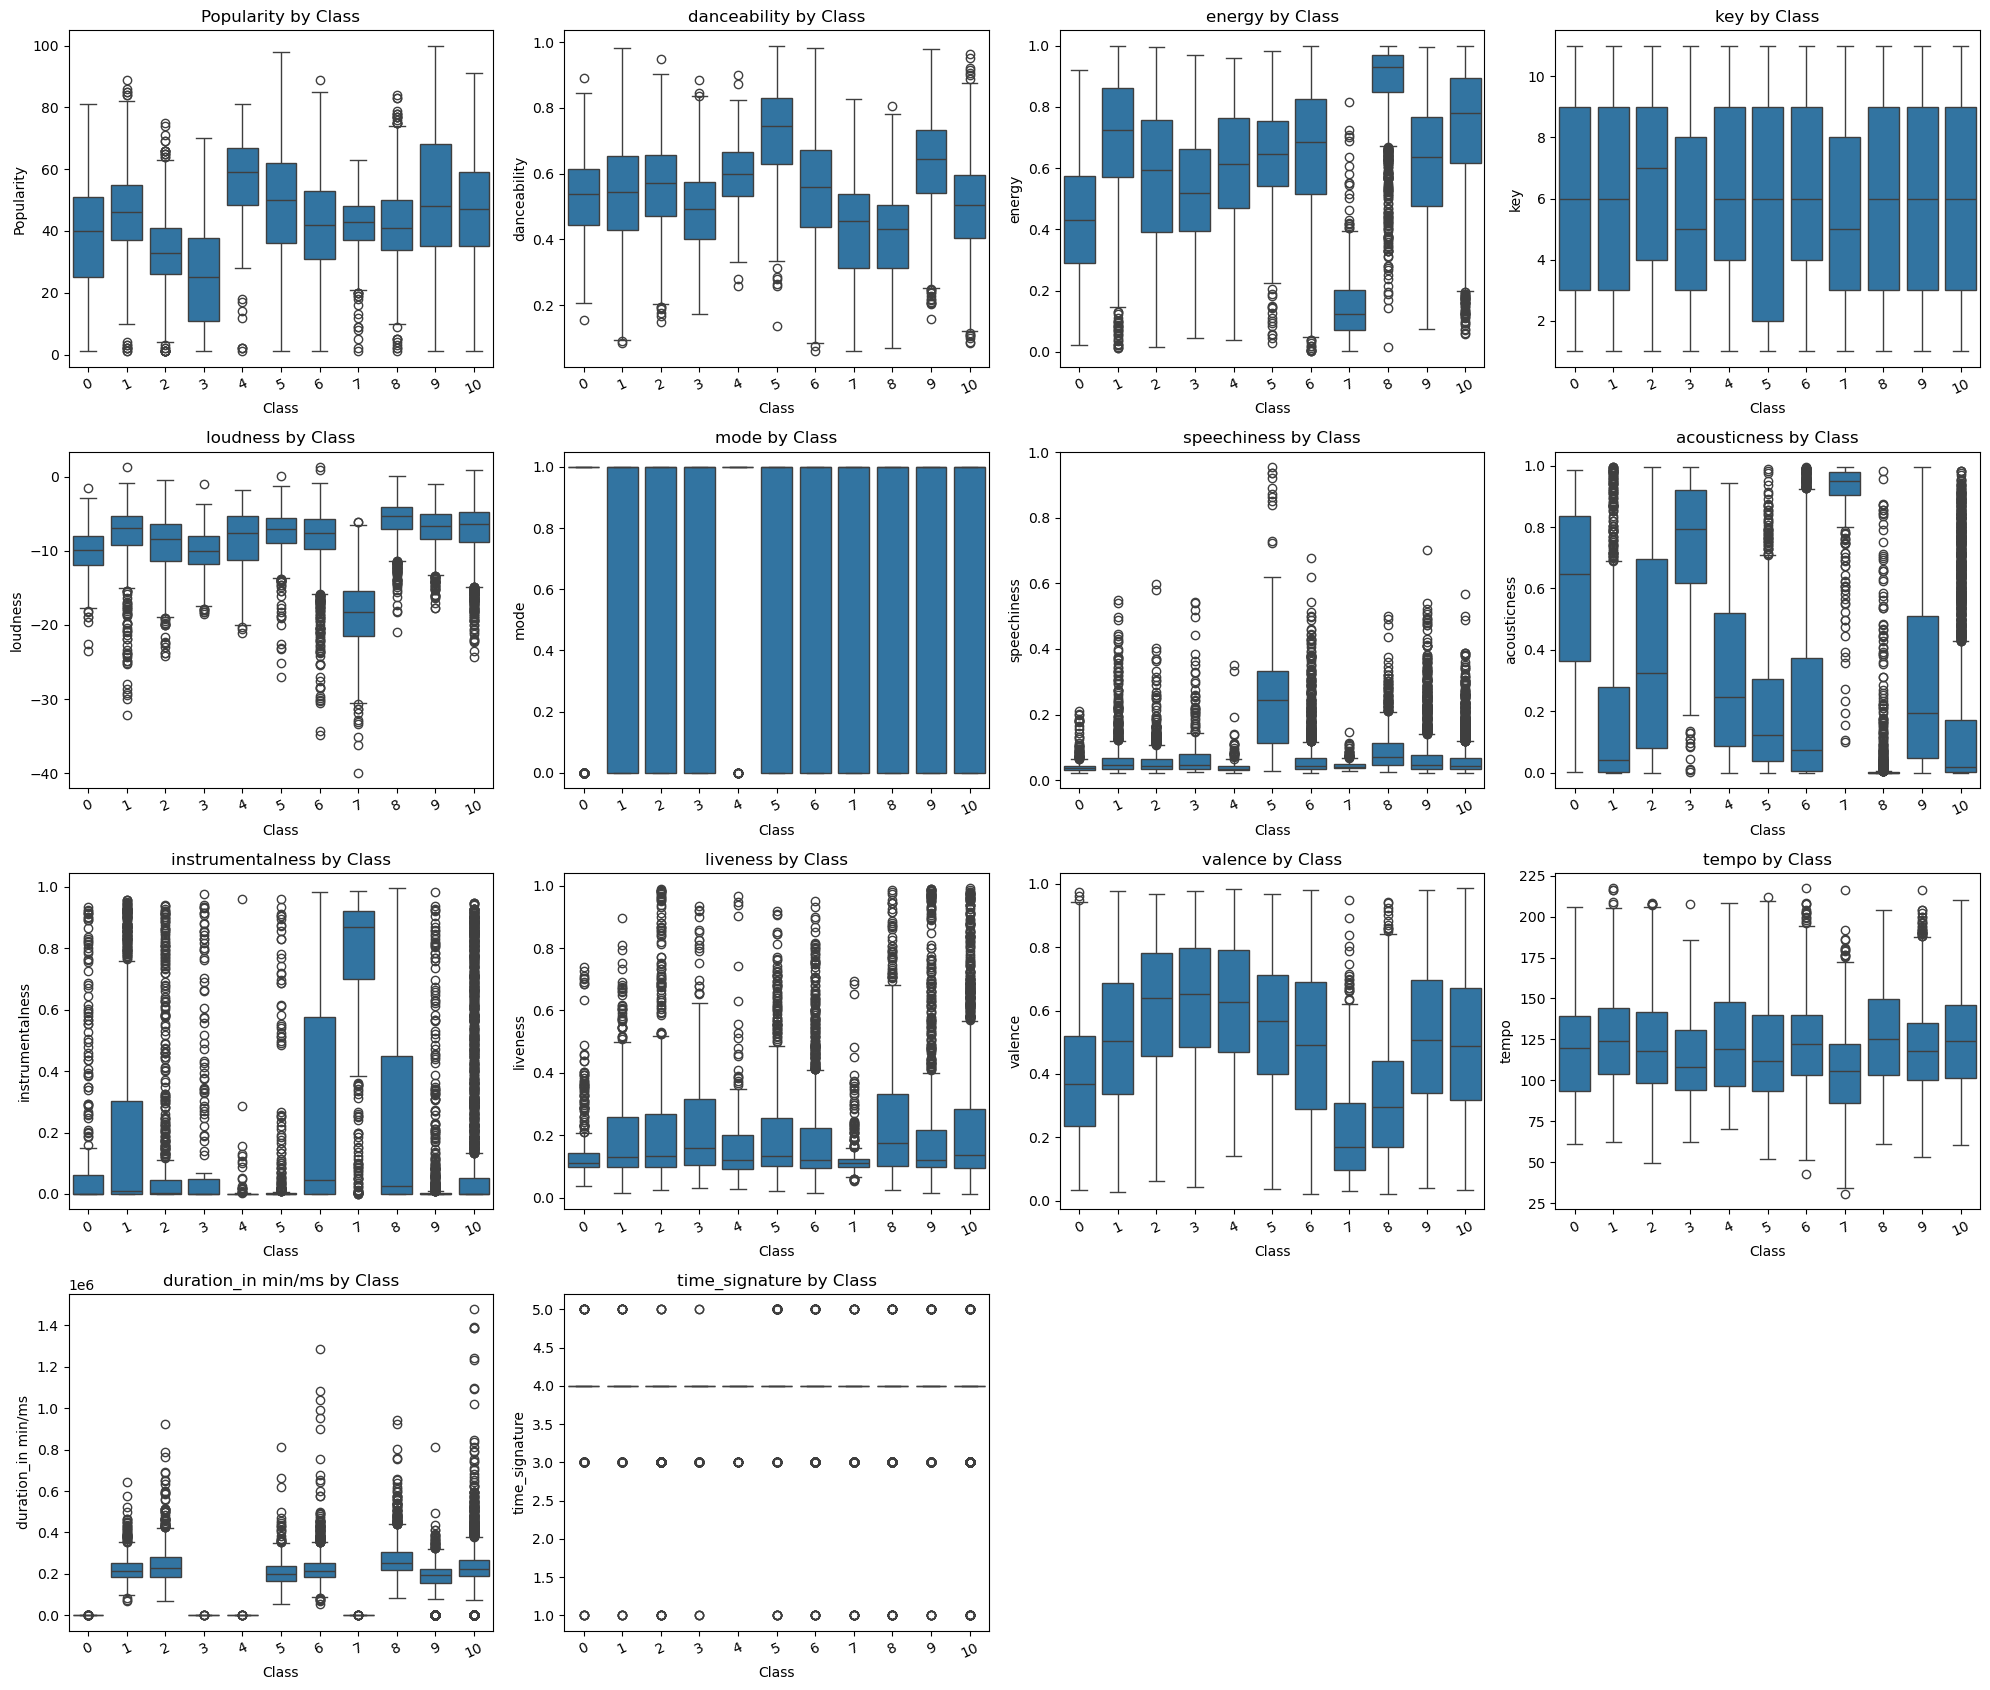

In [10]:
### Chọn các numeric columns (trừ Class and Id)
# Get all numerical columns: 
numerical_cols = data_train.select_dtypes(include='number').columns.tolist()
# Drop columns: Class & Id
removed_cols = ['Class', 'Id']
numerical_cols = [col for col in numerical_cols if col not in removed_cols]
# print(numerical_cols)

# Boxplot for each feature by class:
BOXPLOT_N_COLUMNS = 4
fig, axes = plt.subplots(ncols=BOXPLOT_N_COLUMNS, nrows=len(numerical_cols)//BOXPLOT_N_COLUMNS + 1, figsize=(20, 5*len(numerical_cols)//BOXPLOT_N_COLUMNS))

# axes: many axis, because our figure have a lots subplot, so axes is 2D array.
axes = axes.flatten()   # flatten 2D array -> 1D array

for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=data_train, x='Class', y=col, ax=axes[idx])    # ax: current subplot which we are interacting in our figure
    axes[idx].set_title(f"{col} by Class")
    axes[idx].tick_params(axis='x', rotation=25)    # rotate x axis 25* counterclockwise (left rotation) (clockwise - right rotation)

# Hide abundance subplot
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show();


- Explain: 
    + Good features:
        + Boxplot of each class is not overlay
        + Distance between median line is large
        + IQR: clearly separated
    ```markdown
        Class 1: [----●----]           (median = 0.2)
        Class 5:              [----●----]  (median = 0.7)
        Class 10:                        [----●----] (median = 0.9)
    ```

    + Bad features: 
    ```markdown
        Class 1: [--------●--------]
        Class 5: [--------●--------]
        Class 10:[--------●--------]
    ```

- Comment:
    + **'acousticness'** is a good features
    + **Class 7** is different from all features in almost features (*energy, loudness, valence*)

#### b. Cross tabulation

In [11]:
# #--- Get name of categorical columns, return a list
# # .columns  : [object] get categorical columns name, like: Index(['Artist Name', 'Track Name'], dtype='object')
# # .toList() : convert this object to list
# categorical_cols = data_train.select_dtypes(include='object').columns.tolist()
# # print(categorical_cols)

# # Create cross tabulation and heatmap for each categorical:
# for col in categorical_cols:
#     # Cross tabulation: is a table showing the frequency distribution of variables
#     # Syntax: 
#     #       pd.crosstab(index=..., columns=..., values=..., normalize=...)
#     #   - index: rows
#     #   - columns: values to group by in the columns
#     crosstab = pd.crosstab(index=data_train[col], columns=data_train['Class'], normalize='columns') * 100
    
#     plt.figure(figsize=(12, 6))
#     sns.heatmap(data=crosstab, annot=True, fmt='.1f', cmap='Blues')
#     plt.title(f"Distribution of {col} across Classes (%)")
#     plt.xlabel('Class')
#     plt.ylabel(col)
#     plt.show()



#### c. **Pair plot**: Visual overlap between classes

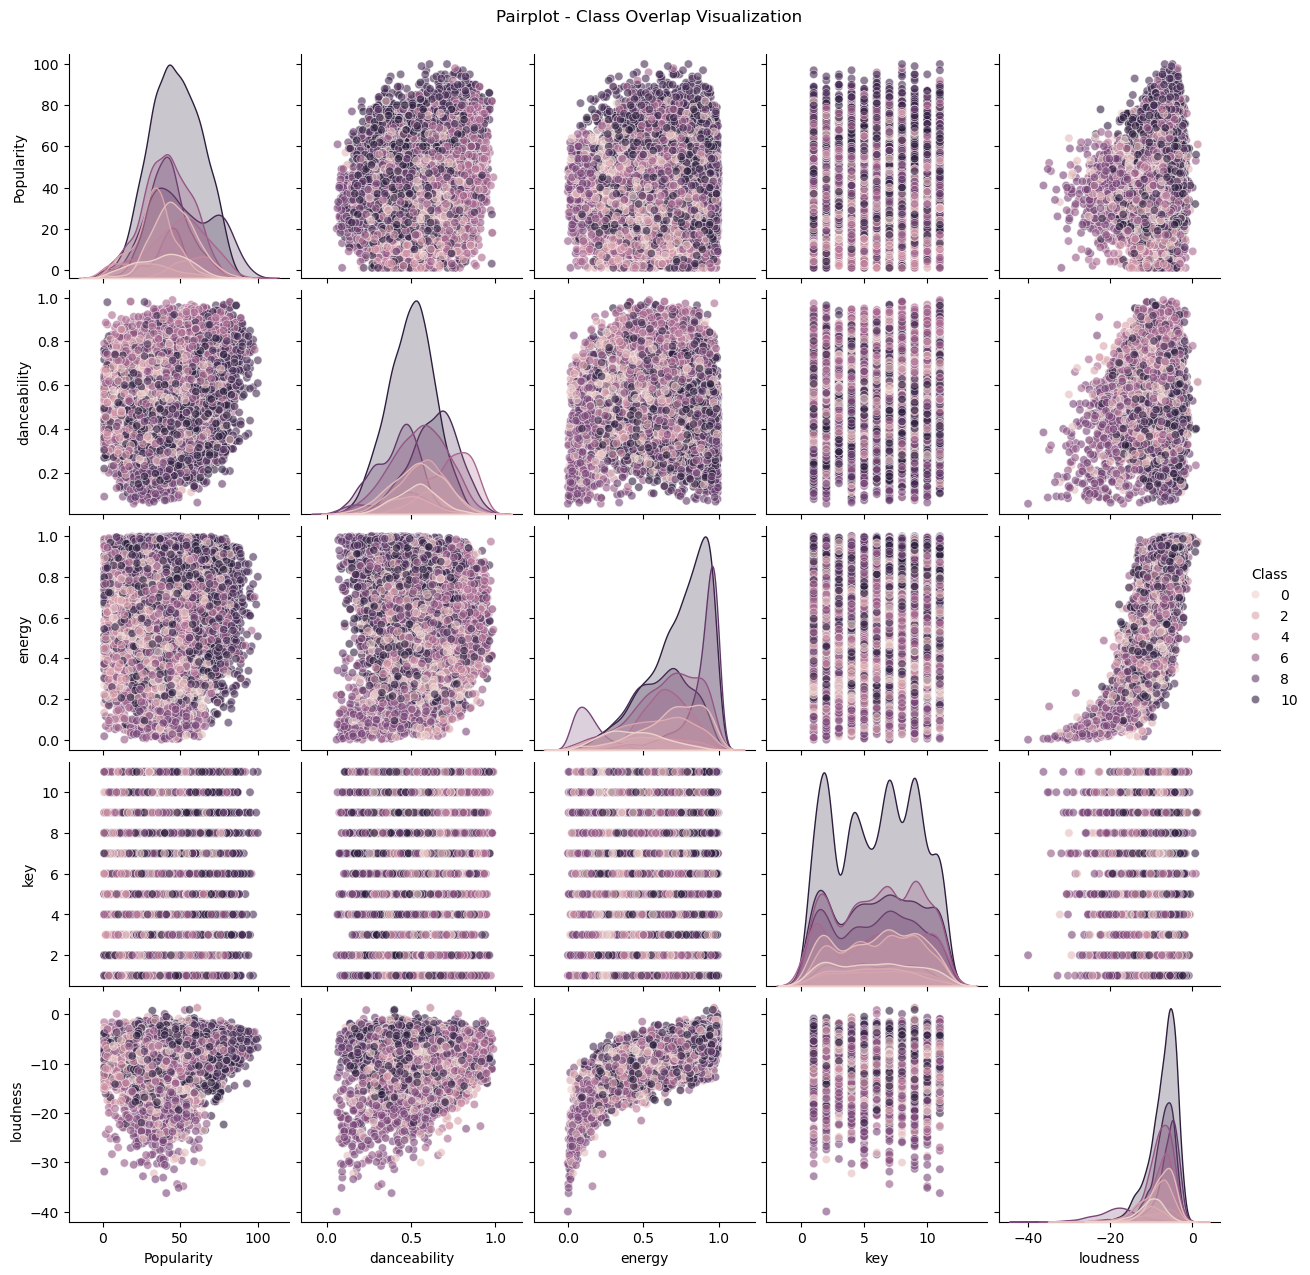

In [15]:
#--- Pair plot ---#
# vars=numerical_cols[:5]   :   plot for first 5 cols (popularity, danceability, energy, key, loudness)
# diag_kind='kde'           :   diagonal draw KDE (Kernel Density Estimation) - phân phối mật độ
# plot_kws={'alpha': 0.6}   :   transparency: 0.6 --> seeing overlap
sns.pairplot(data=data_train, hue='Class', vars=numerical_cols[:5], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot - Class Overlap Visualization', y=1.02)
plt.show();

- Explain:
    + Diagonal: distribution of each feature per class
    + Off-diagonal: scatter plots between pairs of features, colored by class
    + Overlap zones: areas where points from different classes cluster together:
    
        ```markdown
        Class 1: ●●●●
        Class 2: ●●●●  <- Overlap zone
        Class 3:      ●●●●
        ```
    + Clear separation: distinct clusters of points for each class with minimal overlap
    
        ```markdown
        Class 1: ●●●●   
        Class 2:      ●●●●
        Class 3:           ●●●●
        ```
- Comment: 
    + **'energy', 'loudness'**: clear separation between classes, good features
    + **'popularity'**: significant overlap between classes, bad features
    + **'danceability'**: moderate overlap, consider: useful feature

In [ ]:
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>